In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle


In [2]:
df = pd.read_csv('student-mat.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
 #obviously saari values ko teko integers mein bhi convert karna padega

In [4]:
data = df[['G1','G2','G3','absences','failures','studytime','freetime',]]
data.head()

,G1,G2,G3,absences,failures,studytime,freetime
0,5,6,6,6,0,2,3
1,5,5,6,4,0,2,3
2,7,8,10,10,3,2,3
3,15,14,15,2,0,3,2
4,6,10,10,4,0,2,3


In [5]:
predict = 'G3'
#x = np.array(data.drop(columns = ['G3']))
x = np.array(data.drop(columns = [predict]))
#better way would be to use predict variable that can be changed instead of G3
data.head()
#x
y = np.array(data[predict])

In [6]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)

In [13]:

best_acc = 0
best_model = None
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)

for i in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)
    
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    #print(acc)

    if acc > best_acc:
        best_acc = acc
        best_model = linear
        print(best_acc)
        
# Save the best model
with open('student_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)


# Load and test the best model on the consistent test data
pickle_in = open('student_model.pickle', 'rb')
linear = pickle.load(pickle_in)
final_acc = linear.score(x_test, y_test)
print(f"Final accuracy with the best model: {final_acc}")


0.9102720082638004
0.9150688000152579
0.9195050601387494
0.9431950661456119
0.9450806641804778
Final accuracy with the best model: 0.8175394217377268


In [8]:
predictions = linear.predict(x_test)
    
    for x in range (len(predictions)):
        print(predictions[x], x_test[x], y_test[y])

'predictions = linear.predict(x_test)\n    \n    for x in range (len(predictions)):\n        print(predictions[x], x_test[x], y_test[y])'

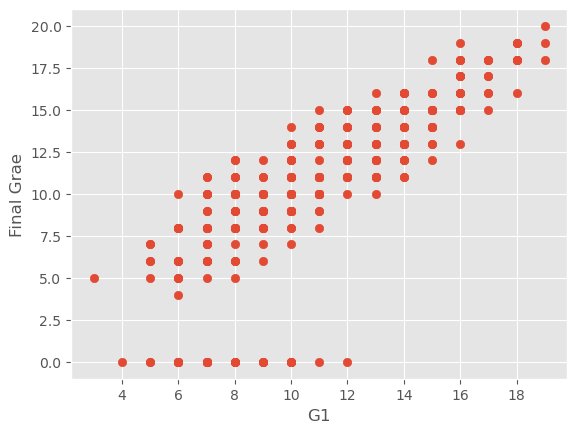

In [15]:
p = 'G1'
style.use ("ggplot")
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel('Final Grae')
plt.show()